In [32]:
!python evo_main.py 100 100 3

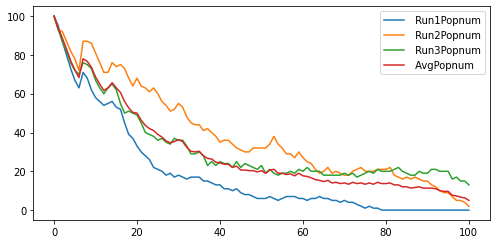

In [33]:
fname1 = "sim_output/ind_population_data.csv"
fname2 = "sim_output/fsource_population_data.csv"

graph_plots(fname1, fname2)

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import subprocess

def graph_evo_out(fname):
    # Set the figure size
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    # Make a list of columns
    command = "head -n 1 " + fname + " | cut -d ',' -f 2,3,4,5"
    all_col = subprocess.check_output(command, shell=True).rstrip()
    all_col = all_col.decode("utf-8")
    columns = all_col.split(',')

    # Read a CSV file
    df = pd.read_csv(fname, usecols=columns)

    # Plot the lines
    df.plot()
    plt.show()
    
def graph_plots(fname1, fname2):
    graph_evo_out(fname1)
    # graph_evo_out(fname2)

### Notes: 
1. No altruism - mode 1 
- Organisms eat from a tree 
- Some trees have predators in them 
- Individuals that visit trees with predators get eaten 
- If individual does not get eaten, it reproduces 

2. Altruism - mode 2
- When an individual visits a tree with a predator, it has 2 options: 
    1. Gene1 allele1: runs away (leaving others to die) 
    2. Gene1 allele2: yells/warsns others of predator (increase the chance of being eaten)

3. Green beard altruism - mode 3
- All individuals with the altruism allele has phylogenetic green beard feature 
    - Altruistic individuals will only warn those with the green beard of predators 

4. More complicated green beard altruism - mode 4 
- Gene1: 
    - Allele A: altruism towards other green beards
    - Allele a: no altruism 
- Gene2: 
    - Allele B: no green beard
    - Allele b: green beard 
- 4 possible combinations: 
    1. Beard + altruism 
    2. Beard + no altruism 
    3. No beard + no altruism 
    4. No beard + altruism 

5. Green beard altruism linkage - mode 5 
- The altruism gene and green beard gene can be linked based on user input. 

### Notes on the Genes that each Individual can have
Some genes are assigned a number in the range of 0-10, 0 means that gene is not very effective at the function, where as 10 means the gene is very effective at the assigned function. 
Sum of the numbers from the genes should not exceed the (number of genes x 4) - this aims to simulate evolutionary cost. 
The traits currently include (more can be added):
1. Ability to sense predator - higher number means higher chance of sensing presence of a predator before approaching a food source 
2. Ability to sense food - not all food sources will have food available, therefore this will allow for organism to better find food (there is limited energy to find food) 
3. Ability to run away from predator - if individual runs into predator, it has the ability to run away
4. Energy - probability individual has more than the base energy (base energy provided in config) 
5. Mutation rate - probability that genetic information inherited by offspring will mutate 
  
Genes that are either 0 or 1 - the individual has it or it doesn't
4. Ability to alert others who are also altruistic  
5. Phenotypic marker of altruistic trait - if individual has this trait, others who are altruistic will alert this individual of predators